## Plot Bering Sea Ice area in winter from daily data

Plot annual winter sea ice area in the Bering Sea from daily [NSIDC Sea Ice Index](https://nsidc.org/data/g02135), data accessed 3/3/2023 from https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/seaice_analysis/

Fetterer, F., K. Knowles, W. N. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8.

### Import packages

In [1]:
import numpy as np, numpy.ma as ma
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### Read in data from NSIDC sea ice index 

In [2]:
# import .xlsx file with regional ice area data from sea ice index
# from sheet with Bering Sea sea ice area

#========================================================================================================
data_path = '/Volumes/Jewell_EasyStore/IceBloomData/N_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx'
#========================================================================================================

df = pd.read_excel(data_path, sheet_name='Bering-Area-km^2')


### Calculate mean sea ice area across winter (January - April) of each year 1979 - 2022

In [3]:
# find may 1, then only grab data up to he day before
df_winter = df[0:np.where(df.month == 'May')[0][0]]

# calculate mean winter area between 1979 - 2022
years = np.arange(1979, 2023)
JFMA_mean = np.array([])
for year in years:
    mean_area = np.nanmean(df_winter[year]) # square kilometers
    JFMA_mean = np.append(JFMA_mean, mean_area)

### Plot timeseries of Jan-Apr mean Bering Sea sea ice area

Mean sea ice area 1979-2022: 4.3 * 10^5 km^2
2018 sea ice area: 1.3 * 10^5 km^2


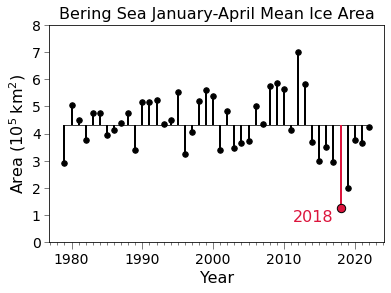

In [4]:
# create figure
#--------------
fig, ax = plt.subplots(figsize=(6,4))
FS = 16 # fontsize
ax.set_title('Bering Sea January-April Mean Ice Area', fontsize=FS)

# add line along average sea ice area
#------------------------------------
print(f'Mean sea ice area {years[0]:.0f}-{years[-1]:.0f}: {np.nanmean(JFMA_mean/100000):.1f} * 10^5 km^2')
ax.hlines(np.nanmean(JFMA_mean/100000), years[0],years[-1], 
          colors='k', lw=0.75, linestyle='solid', zorder=-1)

# plot points for each year winter ice area
#------------------------------------------
ax.scatter(years, JFMA_mean/100000, marker='o', c='k', s=30, zorder=0)

# plot vertical lines for each year
#-----------------------------------
for ii in range(len(years)):
    if years[ii] == 2018:
        C='crimson'
    else:
        C='k'
    if np.isnan(JFMA_mean[ii])==False:
        ax.vlines(years[ii],JFMA_mean[ii]/100000, np.nanmean(JFMA_mean/100000),
              colors=C, lw=2, zorder=-1)
    
# set x and y axis labels
#------------------------
ax.set_yticks(np.arange(0,9));
ax.set_yticklabels(np.arange(0,9), fontsize=FS-2);
ax.tick_params('y', length=5, width=0.5, which='major')
ax.set_ylim(0,8)
ax.set_ylabel('Area ($\mathrm{{10}^{5} \; km^2}$)', fontsize=FS)
ax.set_xlabel('Year', fontsize=FS)

years_to_label = np.arange(1979,2023)[1::10]
ax.set_xticks(years_to_label);
ax.set_xticklabels(years_to_label, fontsize=FS-2);

# Make a plot with major ticks that are multiples of 10
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params('x', length=7, width=0.5, which='major')
ax.tick_params('both', length=3, width=0.5, which='minor')


# label the 2018 minimum
#-----------------------
min_2018 = JFMA_mean[np.where(years==2018)[0][0]]
print(f'2018 sea ice area: {min_2018/100000:.1f} * 10^5 km^2')
ax.text(2018-1, 0.75, '2018', fontsize=FS, 
        horizontalalignment='right', c='crimson')
ax.scatter(2018,min_2018/100000, 
           facecolor='crimson', edgecolor='k', lw=1, s=70, zorder=1)

# add credit to NSIDC
#--------------------
# text_credit = 'Credit: Sea Ice Index, National Snow and Ice Data Center.'
# ax.text(2024, 8.25, text_credit, fontsize=10, 
#         horizontalalignment='right', c='k')
# ax.text(2024, 8.9, 'Bering Sea January-April Mean Ice Area', fontsize=FS, 
#         horizontalalignment='right', c='k')

# save figure
#------------
# fig.savefig('./figures/BeringIceArea_annual.png', transparent=False, dpi=300, bbox_inches='tight', pad_inches=0)

